<a href="https://colab.research.google.com/github/Trailblazer29/Breast-Cancer-Detection/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Breast Cancer Diagnosis</center></h1>

In this use case, we will explore the **Breast Cancer Wisconsin Dataset** and ultimately build a predictive model to classify a cell as being **Malignant (M/0)** or **Benign (B/1)**.

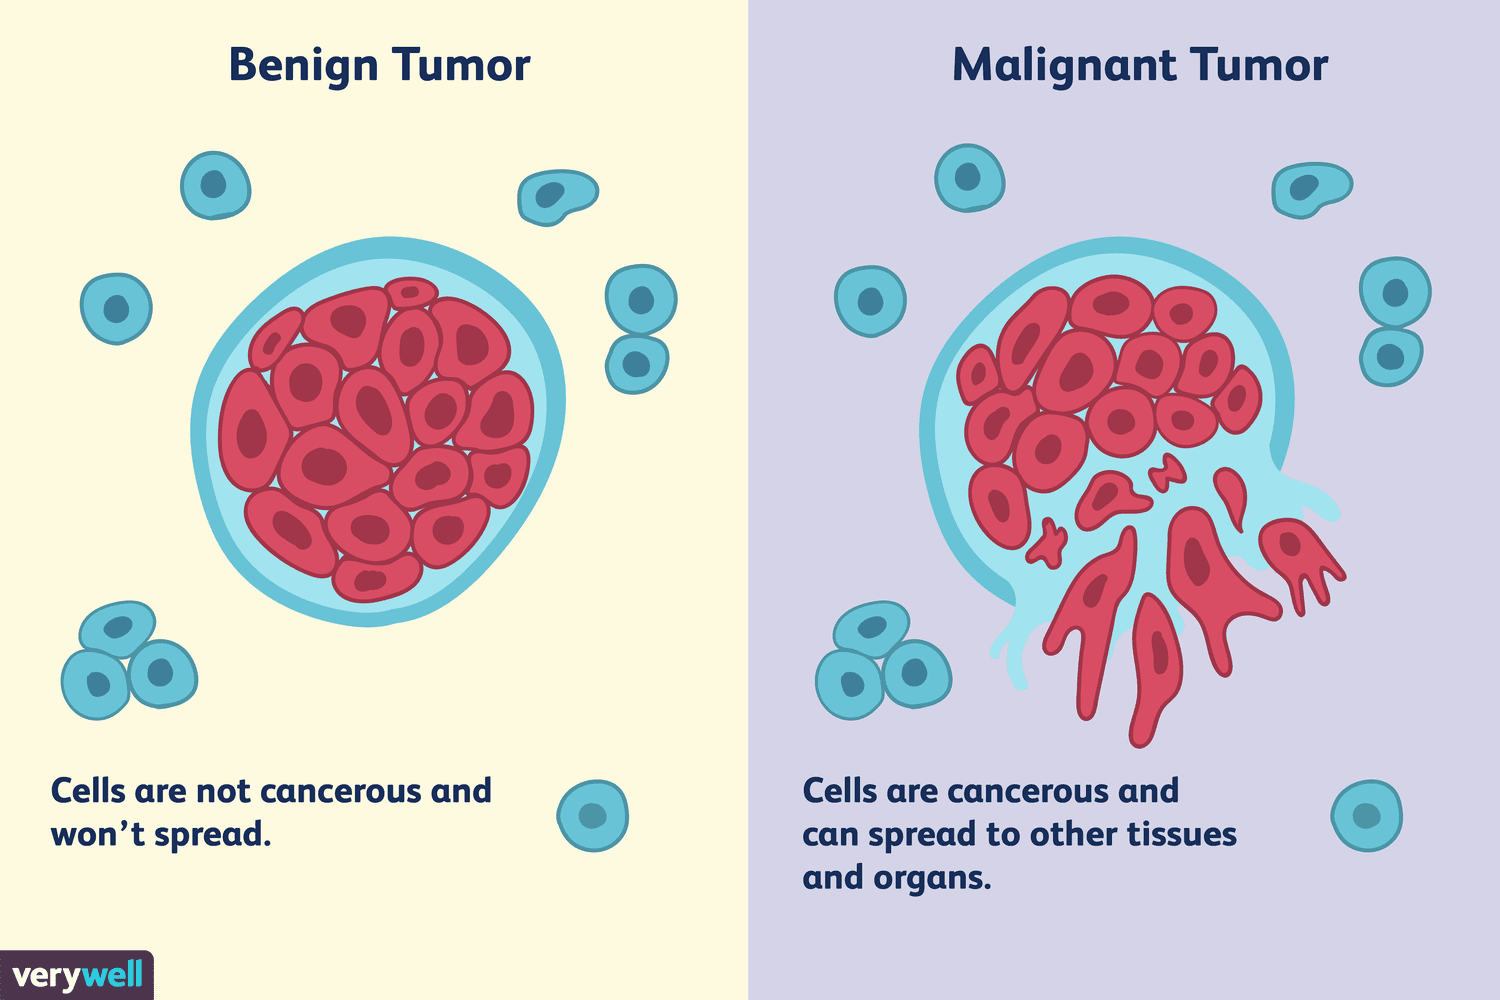
*Source: https://www.verywellhealth.com/what-does-malignant-and-benign-mean-514240*


The dataset can be accessed and downloaded through the following URL: https://kaggle.com/datasets/uciml/breast-cancer-wisconsin-data. Note that it can also be imported from the scikit-learn library.

It is worthy to mention that the Breast Cancer Wisconsin dataset was derived using the **Fine Needle Aspiration (FNA)** biopsy procedure.

 # Exploratory Data Analysis

In [1]:
# Import libraries & dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Load dataset from sklearn
bc_data = sklearn.datasets.load_breast_cancer()

In [3]:
print(bc_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
# Convert dataset from numpy array to data frame
bc_data_df = pd.DataFrame(data = bc_data.data, columns = bc_data.feature_names)

Let's have a glimpse of the dataset:

In [5]:
bc_data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We should add the output - "target" to the dataset.

In [6]:
# Add the "target" output column to the data frame
bc_data_df['label'] = bc_data.target

In [7]:
bc_data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
bc_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

✍ The following can be noticed:
*   The are 569 observations, 30 input features and the output (0 for Malignant cell and 1 for Benign cell).
*   All features are numerical and have no missing values.

Let's have a look at the data summary statistics:

In [9]:
bc_data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


❗ We can notice that features fit within very different intervals. Hence, we will scale them accroding to the Min-Max Normalization method (range between 0 and 1).

In [10]:
# Min-Max Normalization
data_inputs = bc_data_df.drop(columns="label", axis=1)
output = bc_data_df["label"]
features = data_inputs.columns

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_inputs)
bc_data_df = pd.DataFrame(data = scaled_data, columns = features)
bc_data_df["label"] = output

bc_data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596,0.627417
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700,0.000000
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977,1.000000
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Distribution of the Target variable
target_dist = bc_data_df['label'].value_counts()
print(target_dist)

1    357
0    212
Name: label, dtype: int64


✍ As per the dataset's [metadata](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data), there are 357 Benign cases against 212 Malignant ones, meaning that **1 refers to the Benign class and 0 to the Malignant one**.

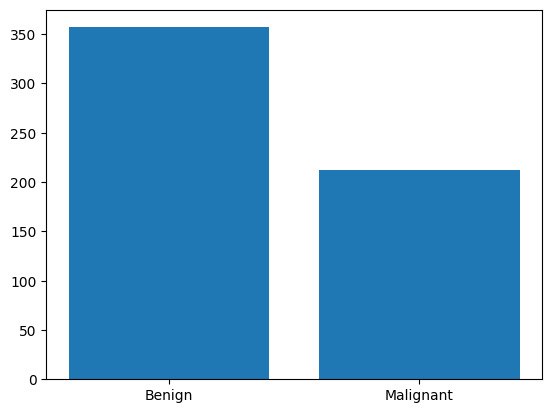

In [12]:
target_val = ["Benign", "Malignant"]
target_dist = [target_dist[1], target_dist[0]]
plt.bar(target_val, target_dist)
plt.show()

In [13]:
print(bc_data_df.groupby('label').mean())

       mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
label                                                                          
0         0.496087      0.402263        0.494613   0.354136         0.453810   
1         0.244476      0.277469        0.236925   0.135436         0.359733   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
label                                                                         
0              0.385890        0.376698             0.437326       0.438934   
1              0.186199        0.107914             0.127820       0.344374   

       mean fractal dimension  ...  worst radius  worst texture  \
label                          ...                                
0                    0.267904  ...      0.469755       0.461040   
1                    0.271849  ...      0.193874       0.306372   

       worst perimeter  worst area  worst smoothness  worst compactness  \
label             

💡 We can notice that the average/mean value for most features is greater for Malignant cells than Benign.

# Data Processing

## Model Building

In [14]:
# Separate the input features from the target
X = bc_data_df.drop(columns='label', axis=1)
y = bc_data_df['label']

In [15]:
# Split the dataset into training & testing sets with a 80%-20% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [16]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

### Accuracy

In [17]:
# Model accuracy on training data
y_train_predicted = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_predicted)

# Model accuracy on testing data
y_test_predicted = model.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_test_predicted)

In [20]:
print("Accuracy on training data: ", round(training_accuracy*100, 2),"%")
print("Accuracy on testing data: ", round(testing_accuracy*100, 2), "%")

Accuracy on training data:  97.14 %
Accuracy on testing data:  96.49 %


### Specificity

In [22]:
conf_matrix = confusion_matrix(y_test, y_test_predicted)
print(conf_matrix)

[[41  4]
 [ 0 69]]


In [23]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn+fp)
print("Specificity: ", round(specificity*100, 2), "%")

Specificity:  91.11 %


### Sensitivity

In [24]:
sensitivity = tp / (tp+fn)
print("Sensitivity: ", round(sensitivity*100, 2), "%")

Sensitivity:  100.0 %
